<p><br>
<center>
<b><h1>ALY6140 : Analytics System Technology</h1></b>
<b><h2>Northeastern University</h2></b>
<b><h2>Professor Daya Rudhramoorthi </h2></b>
<b><h2>Group 1 - Bhavik Bhosale, Sneha Rokkam</h2></b>
<b><h2>Capstone Group Project</h2></b>
<b><h2>Boston Property Assesment</h2></b>
</center>
</p>

## Import Libraries

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score,mean_squared_error, r2_score, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, ridge_regression, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error

#from lightgbm import LGBMClassifier, LGBMRegressor

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Import Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.2f}'.format


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Read the Dataset

In [98]:
from group1_capstone import BostonPropertyDataFetcher
# Commenting the below code as the API fetches data in a loop of count 362. Saved the resultant dataframe to a csv and will read the data from the csv

url = 'https://data.boston.gov/datastore/odata3.0/1000d81c-5bb5-49e8-a9ab-44cd042f1db2?$format=xml'

# boston_data = BostonPropertyDataFetcher(url)

# assessment_data = boston_data.fetch_data()

# Read the CSV file
assessment_data = pd.read_csv('BostonProp.csv')

# Update column names
assessment_data.columns = assessment_data.columns.str[2:]

assessment_data.head(5)


,_id,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,OWNERMAILADDRESS,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,RC_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,ROOF_COVER,INT_WALL,EXT_FNISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,1,100001000,NaN,100001000,104.00,PUTNAM ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RE - Row End,Y,PASCUCCI CARLO,"195 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3353.00,2202.00,195700,588500,784200,8422.31,1900.00,NaN,NaN,F - Flat,C - Composition,N - Normal,A - Asbestos,A - Average,F - Fair,A - Average,6.00,3.00,0.00,3.00,12.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,3.00,A - Average,NaN
1,2,100002000,NaN,100002000,197.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,Y,SEMBRANO RODERICK,"197 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3299.00,2307.00,196500,615300,811800,8718.73,1920.00,2000.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,3.00,3.00,0.00,3.00,9.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,M - Modern,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.00,NaN,0.00,A - Average,NaN
2,3,100003000,NaN,100003000,199.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,GUERRA CHEVARRIA ANA S,"199 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3392.00,2268.00,197100,599200,796300,8552.26,1905.00,1985.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,G - Good,A - Average,5.00,3.00,0.00,3.00,13.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
3,4,100004000,NaN,100004000,201.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,"MADDALENI JAMES E, TS","PO BOX 557 #, EVERETT, MA 02149",3.00,NaN,NaN,NaN,NaN,1150.00,3108.00,2028.00,197700,530200,727900,7817.65,1900.00,1991.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,5.00,3.00,0.00,3.00,11.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
4,5,100005000,NaN,100005000,203.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,104,R2,TWO-FAM DWELLING,RE - Row End,Y,MARKS TRAVIS JOSEPH,"203 Lexington ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,2010.00,3700.00,2546.00,225700,569100,794800,8536.15,1900.00,1978.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,6.00,3.00,0.00,2.00,13.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,2F - 2 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN


In [99]:
assessment_data.shape

(180627, 61)

In [100]:
assessment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180627 entries, 0 to 180626
Data columns (total 61 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   _id               180627 non-null  int64  
 1   PID               180627 non-null  int64  
 2   CM_ID             91160 non-null   float64
 3   GIS_ID            180627 non-null  int64  
 4   ST_NUM            171096 non-null  float64
 5   ST_NAME           180627 non-null  object 
 6   UNIT_NUM          80672 non-null   object 
 7   CITY              180622 non-null  object 
 8   ZIP_CODE          180624 non-null  float64
 9   BLDG_SEQ          180626 non-null  float64
 10  NUM_BLDGS         180627 non-null  int64  
 11  LUC               180627 non-null  int64  
 12  LU                180627 non-null  object 
 13  LU_DESC           180627 non-null  object 
 14  BLDG_TYPE         178101 non-null  object 
 15  OWN_OCC           180627 non-null  object 
 16  OWNER             18

## Data Preprocessing

In [101]:
from group1_capstone import DataProcessor

processor = DataProcessor()

processed_data = processor.process_data(assessment_data)


The duplicates found in the PID column: 
 _id                 179
PID                 179
CM_ID                 2
GIS_ID              179
ST_NUM              176
ST_NAME             179
UNIT_NUM              1
CITY                178
ZIP_CODE            179
BLDG_SEQ            179
NUM_BLDGS           179
LUC                 179
LU                  179
LU_DESC             179
BLDG_TYPE           179
OWN_OCC             179
OWNER               179
OWNERMAILADDRESS    179
RES_FLOOR           178
CD_FLOOR              1
RES_UNITS             1
COM_UNITS             0
RC_UNITS              0
LAND_SF             179
GROSS_AREA          178
LIVING_AREA         178
LAND_VALUE          179
BLDG_VALUE          179
TOTAL_VALUE         179
GROSS_TAX           179
YR_BUILT            179
YR_REMODEL           68
STRUCTURE_CLASS       4
ROOF_STRUCTURE      179
ROOF_COVER          179
INT_WALL            177
EXT_FNISHED         179
INT_COND            178
EXT_COND            179
OVERALL_COND        17

In [102]:
processed_data.head(5)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,OWNERMAILADDRESS,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,RC_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,ROOF_COVER,INT_WALL,EXT_FNISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.00,PUTNAM ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RE - Row End,Y,PASCUCCI CARLO,"195 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3353.00,2202.00,195700,588500,784200,8422.31,1900.00,NaN,NaN,F - Flat,C - Composition,N - Normal,A - Asbestos,A - Average,F - Fair,A - Average,6.00,3.00,0.00,3.00,12.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,3.00,A - Average,NaN
1,100002000,NaN,100002000,197.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,Y,SEMBRANO RODERICK,"197 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3299.00,2307.00,196500,615300,811800,8718.73,1920.00,2000.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,3.00,3.00,0.00,3.00,9.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,M - Modern,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.00,NaN,0.00,A - Average,NaN
2,100003000,NaN,100003000,199.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,GUERRA CHEVARRIA ANA S,"199 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3392.00,2268.00,197100,599200,796300,8552.26,1905.00,1985.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,G - Good,A - Average,5.00,3.00,0.00,3.00,13.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
3,100004000,NaN,100004000,201.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,"MADDALENI JAMES E, TS","PO BOX 557 #, EVERETT, MA 02149",3.00,NaN,NaN,NaN,NaN,1150.00,3108.00,2028.00,197700,530200,727900,7817.65,1900.00,1991.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,5.00,3.00,0.00,3.00,11.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
4,100005000,NaN,100005000,203.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,104,R2,TWO-FAM DWELLING,RE - Row End,Y,MARKS TRAVIS JOSEPH,"203 Lexington ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,2010.00,3700.00,2546.00,225700,569100,794800,8536.15,1900.00,1978.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,6.00,3.00,0.00,2.00,13.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,2F - 2 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN


In [103]:
processed_data.shape

(180448, 60)

### Descriptive Statistics

In [104]:
desc_result = processor.describe_numerical_columns(processed_data)
desc_result

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,OWNERMAILADDRESS,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,RC_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,ROOF_COVER,INT_WALL,EXT_FNISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
count,180448.00,91158.00,180448.00,170920.00,180448,80671,180444,180445.00,180447.00,180448.00,180448.00,180448,180448,177922,180448,180448,180447,146944.00,70555.00,10329.00,623.00,37.00,172903.00,145816.00,145526.00,180448.00,180448.00,180448.00,180448.00,157518.00,85330.00,17055,144028,144030,132183,157427,132184,144065,170989,132164.00,169333.00,169486.00,169335.00,132098.00,70470,132351,84870,36190,132334,132347,31715,14031,132604,70811,132590,169489.00,70778,132250.00,133686,70790
unique,NaN,NaN,NaN,NaN,4512,14096,19,NaN,NaN,NaN,NaN,17,194,204,2,142088,150153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,7,7,4,28,5,5,10,NaN,NaN,NaN,NaN,NaN,5,4,4,4,10,4,4,4,7,5,3,NaN,7,NaN,6,2
top,NaN,NaN,NaN,NaN,COMMONWEALTH AV,1,BOSTON,NaN,NaN,NaN,NaN,CD,RESIDENTIAL CONDO,RM - Row Middle,N,CITY OF BOSTON,"140 COMMONWEALTH AVE, CHESTNUT HILL, MA 02467",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C - Brick/Concr,F - Flat,A - Asphalt Shingl,N - Normal,B - Brick/Stone,A - Average,A - Average,A - Average,NaN,NaN,NaN,NaN,NaN,A - Average,M - Modern,M - Modern,M - Modern,O - One Person,M - Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,I - Indiv. Cntrl,N - None,NaN,T - Through,NaN,A - Average,N - No
freq,NaN,NaN,NaN,NaN,4826,8404,47103,NaN,NaN,NaN,NaN,70571,70557,17661,102014,1960,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10155,67322,63541,127473,51925,63778,79318,131614,NaN,NaN,NaN,NaN,NaN,55356,59896,40453,18142,44030,62779,18513,7953,71552,43552,79396,NaN,37274,NaN,109980,57286
mean,1141872743.02,916700965.96,1141873828.03,226.84,NaN,NaN,NaN,2129.84,1.00,1.02,202.66,NaN,NaN,NaN,NaN,NaN,NaN,1.88,3.51,6.84,3.03,3.24,7810.99,5386.36,4369.60,376652.42,1120716.28,1500358.13,16932.77,1932.34,2001.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.15,1.35,0.22,1.05,6.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27,NaN,1.34,NaN,NaN
std,708114503.99,687936774.77,708115414.47,477.35,NaN,NaN,NaN,30.77,0.03,0.46,265.92,NaN,NaN,NaN,NaN,NaN,NaN,1.12,5.27,18.38,10.53,6.13,263198.82,41402.56,38494.85,4424357.56,10808892.37,14123131.29,220704.56,63.72,65.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.10,1.05,0.46,0.81,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.62,NaN,2.42,NaN,NaN
min,100001000.00,100018000.00,100001000.00,0.00,NaN,NaN,NaN,2026.00,1.00,1.00,13.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1.00,1.00,1.00,100.00,3.00,2.00,0.00,0.00,0.00,0.00,1700.00,201.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN
25%,501666750.00,306925000.00,501667000.00,24.00,NaN,NaN,NaN,2119.00,1.00,1.00,102.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,2.00,1.00,1.00,999.00,973.00,947.00,0.00,298500.00,379400.00,3879.29,1900.00,1987.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,1.00,0.00,1.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN
50%,1102683001.00,602642400.00,1102683000.00,68.00,NaN,NaN,NaN,2127.00,1.00,1.00,102.00,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,3.00,1.00,1.00,2008.00,2122.00,1492.00,0.00,488900.00,609227.00,6456.59,1920.00,2004.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,1.00,0.00,1.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.00,NaN,NaN
75%,1810485250.00,1602267000.00,1810485250.00,213.00,NaN,NaN,NaN,2131.00,1.00,1.00,108.00,NaN,NaN,NaN,NaN,NaN,NaN,2.50,4.00,5.00,2.00,2.00,4764.00,4035.00,2611.20,224700.00,744300.00,913100.00,9703.55,1

In [105]:
#Check for numerical and categorical variables in the dataframe 
numerical_variables = processed_data.select_dtypes(include=['int64', 'float64']).columns
categorical_variables = processed_data.select_dtypes(include=['object']).columns

print("Numerical Variables:")
print(numerical_variables)

print("\nCategorical Variables:")
print(categorical_variables)



Numerical Variables:
Index(['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'ZIP_CODE', 'BLDG_SEQ', 'NUM_BLDGS',
       'LUC', 'RES_FLOOR', 'CD_FLOOR', 'RES_UNITS', 'COM_UNITS', 'RC_UNITS',
       'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE',
       'TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT', 'YR_REMODEL', 'BED_RMS',
       'FULL_BTH', 'HLF_BTH', 'KITCHENS', 'TT_RMS', 'FIREPLACES',
       'NUM_PARKING'],
      dtype='object')

Categorical Variables:
Index(['ST_NAME', 'UNIT_NUM', 'CITY', 'LU', 'LU_DESC', 'BLDG_TYPE', 'OWN_OCC',
       'OWNER', 'OWNERMAILADDRESS', 'STRUCTURE_CLASS', 'ROOF_STRUCTURE',
       'ROOF_COVER', 'INT_WALL', 'EXT_FNISHED', 'INT_COND', 'EXT_COND',
       'OVERALL_COND', 'BDRM_COND', 'BTHRM_STYLE1', 'BTHRM_STYLE2',
       'BTHRM_STYLE3', 'KITCHEN_TYPE', 'KITCHEN_STYLE1', 'KITCHEN_STYLE2',
       'KITCHEN_STYLE3', 'HEAT_TYPE', 'HEAT_FUEL', 'AC_TYPE', 'ORIENTATION',
       'PROP_VIEW', 'CORNER_UNIT'],
      dtype='object')


In [106]:
processed_data.head(5)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,OWNERMAILADDRESS,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,RC_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,ROOF_COVER,INT_WALL,EXT_FNISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.00,PUTNAM ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RE - Row End,Y,PASCUCCI CARLO,"195 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3353.00,2202.00,195700,588500,784200,8422.31,1900.00,NaN,NaN,F - Flat,C - Composition,N - Normal,A - Asbestos,A - Average,F - Fair,A - Average,6.00,3.00,0.00,3.00,12.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,3.00,A - Average,NaN
1,100002000,NaN,100002000,197.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,Y,SEMBRANO RODERICK,"197 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3299.00,2307.00,196500,615300,811800,8718.73,1920.00,2000.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,3.00,3.00,0.00,3.00,9.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,M - Modern,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.00,NaN,0.00,A - Average,NaN
2,100003000,NaN,100003000,199.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,GUERRA CHEVARRIA ANA S,"199 LEXINGTON ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,1150.00,3392.00,2268.00,197100,599200,796300,8552.26,1905.00,1985.00,NaN,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,G - Good,A - Average,5.00,3.00,0.00,3.00,13.00,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
3,100004000,NaN,100004000,201.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,"MADDALENI JAMES E, TS","PO BOX 557 #, EVERETT, MA 02149",3.00,NaN,NaN,NaN,NaN,1150.00,3108.00,2028.00,197700,530200,727900,7817.65,1900.00,1991.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,5.00,3.00,0.00,3.00,11.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN
4,100005000,NaN,100005000,203.00,Lexington ST,NaN,EAST BOSTON,2128.00,1.00,1,104,R2,TWO-FAM DWELLING,RE - Row End,Y,MARKS TRAVIS JOSEPH,"203 Lexington ST, EAST BOSTON, MA 02128",3.00,NaN,NaN,NaN,NaN,2010.00,3700.00,2546.00,225700,569100,794800,8536.15,1900.00,1978.00,NaN,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,6.00,3.00,0.00,2.00,13.00,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,2F - 2 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.00,NaN,0.00,A - Average,NaN


### Drop Unwanted Columns

In [107]:
unwanted_columns = ['CM_ID',
                    'GIS_ID',
                    'ST_NUM',
                    'ST_NAME',
                    'UNIT_NUM',
                    'LUC',
                    'LU_DESC',
                    'OWNERMAILADDRESS',
                    'RES_FLOOR',
                    'CD_FLOOR',
                    'RES_UNITS',
                    'COM_UNITS',
                    'RC_UNITS',
                    'LAND_SF',
                    'LAND_VALUE',
                    'ROOF_COVER',
                    'BTHRM_STYLE1',
                    'BTHRM_STYLE2',
                    'BTHRM_STYLE3',
                    'KITCHEN_STYLE1',
                    'KITCHEN_STYLE2',
                    'KITCHEN_STYLE3',
                    'HEAT_FUEL',
                    'FIREPLACES',
                    'ORIENTATION',
                    'NUM_PARKING',
                    'STRUCTURE_CLASS',
                    'BDRM_COND',
                    'BLDG_SEQ',
                    'NUM_BLDGS', 
                    'BLDG_TYPE', 
                    'OWN_OCC',
                    'CORNER_UNIT',
                    'OWNER',
                    'PID',
                    'GROSS_AREA', 
                    'BLDG_VALUE'
                   ]

# Drop these rows from dataFrame
property_data = processed_data.drop(unwanted_columns, inplace = False, axis='columns')

### Missing Value Treatment 

In [108]:
# Count total missing values at each column in DataFrame
missing_values_count = property_data.isnull().sum()

# Calculate percentage of missing values at each column in DataFrame
missing_values_percentage = (property_data.isnull().sum() / len(property_data)) * 100

# Create a new DataFrame with the column name, missing value count and missing value percentage
missing_data_df = pd.DataFrame({
    'Missing Value Count': missing_values_count,
    'Missing Value Percentage': missing_values_percentage
})

# Format the 'Missing Value Percentage' column as a percentage with 2 decimal places
missing_data_df['Missing Value Percentage'] = missing_data_df['Missing Value Percentage'].apply(lambda x: f'{x:.2f}%')

print(missing_data_df)

                Missing Value Count Missing Value Percentage
CITY                              4                    0.00%
ZIP_CODE                          3                    0.00%
LU                                0                    0.00%
LIVING_AREA                   34922                   19.35%
TOTAL_VALUE                       0                    0.00%
GROSS_TAX                         0                    0.00%
YR_BUILT                      22930                   12.71%
YR_REMODEL                    95118                   52.71%
ROOF_STRUCTURE                36420                   20.18%
INT_WALL                      48265                   26.75%
EXT_FNISHED                   23021                   12.76%
INT_COND                      48264                   26.75%
EXT_COND                      36383                   20.16%
OVERALL_COND                   9459                    5.24%
BED_RMS                       48284                   26.76%
FULL_BTH                

In [109]:
property_data.head(5)

,CITY,ZIP_CODE,LU,LIVING_AREA,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,ROOF_STRUCTURE,INT_WALL,EXT_FNISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE,PROP_VIEW
0,EAST BOSTON,2128.00,R3,2202.00,784200,8422.31,1900.00,NaN,F - Flat,N - Normal,A - Asbestos,A - Average,F - Fair,A - Average,6.00,3.00,0.00,3.00,12.00,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None,A - Average
1,EAST BOSTON,2128.00,R3,2307.00,811800,8718.73,1920.00,2000.00,F - Flat,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,3.00,3.00,0.00,3.00,9.00,3F - 3 Full Eat In Kitchens,F - Forced Hot Air,C - Central AC,A - Average
2,EAST BOSTON,2128.00,R3,2268.00,796300,8552.26,1905.00,1985.00,F - Flat,N - Normal,M - Vinyl,A - Average,G - Good,A - Average,5.00,3.00,0.00,3.00,13.00,3F - 3 Full Eat In Kitchens,S - Space Heat,N - None,A - Average
3,EAST BOSTON,2128.00,R3,2028.00,727900,7817.65,1900.00,1991.00,M - Mansard,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,5.00,3.00,0.00,3.00,11.00,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None,A - Average
4,EAST BOSTON,2128.00,R2,2546.00,794800,8536.15,1900.00,1978.00,M - Mansard,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,6.00,3.00,0.00,2.00,13.00,2F - 2 Full Eat In Kitchens,W - Ht Water/Steam,N - None,A - Average


In [110]:
#Imputing mean values in place of missing data
city_means = round(property_data.groupby('CITY')['YR_BUILT'].mean())
property_data['YR_BUILT'] = property_data.groupby('CITY')['YR_BUILT'].transform(lambda x: x.fillna(round(x.mean())))

In [111]:
# Get unique values in 'OVERALL_COND' column
unique_conditions = property_data['OVERALL_COND'].unique()

# Mapping of condition categories to numerical values
category_mapping = {
    'A - Average': 2,
    'G - Good': 3,
    np.nan: np.nan,  # If you want to keep NaN values as NaN
    'P - Poor': 1,
    'F - Fair': 2,
    'E - Excellent': 4,
    'VG - Very Good': 4,
    'EX - Excellent': 4
}

# Map condition categories to numerical values
property_data['OVERALL_COND'] = property_data['OVERALL_COND'].map(category_mapping)

# Get unique values in 'OVERALL_COND' column after mapping
unique_conditions_updated = property_data['OVERALL_COND'].unique()

# Fill NaN values in 'OVERALL_COND' column with the mean value per 'CITY' group
property_data['OVERALL_COND'] = property_data.groupby('CITY')['OVERALL_COND'].transform(
    lambda x: x.fillna(round(x.mean()))
)


In [112]:
property_data['YR_REMODEL'] = property_data['YR_REMODEL'].fillna(property_data['YR_BUILT'])
property_data.dropna(inplace=True)

In [113]:
# Check the percentage and count of the missing data 

def print_missing_value_summary(df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{:<15s} : {:<5d} \t: {:.2f}%'.format(col, sum(df[col].isnull()), round(pct_missing * 100, 2)))

print_missing_value_summary(property_data)

CITY            : 0     	: 0.00%
ZIP_CODE        : 0     	: 0.00%
LU              : 0     	: 0.00%
LIVING_AREA     : 0     	: 0.00%
TOTAL_VALUE     : 0     	: 0.00%
GROSS_TAX       : 0     	: 0.00%
YR_BUILT        : 0     	: 0.00%
YR_REMODEL      : 0     	: 0.00%
ROOF_STRUCTURE  : 0     	: 0.00%
INT_WALL        : 0     	: 0.00%
EXT_FNISHED     : 0     	: 0.00%
INT_COND        : 0     	: 0.00%
EXT_COND        : 0     	: 0.00%
OVERALL_COND    : 0     	: 0.00%
BED_RMS         : 0     	: 0.00%
FULL_BTH        : 0     	: 0.00%
HLF_BTH         : 0     	: 0.00%
KITCHENS        : 0     	: 0.00%
TT_RMS          : 0     	: 0.00%
KITCHEN_TYPE    : 0     	: 0.00%
HEAT_TYPE       : 0     	: 0.00%
AC_TYPE         : 0     	: 0.00%
PROP_VIEW       : 0     	: 0.00%


In [114]:
property_data.shape

(132011, 23)

### Categorical Variables 

In [115]:
columns = property_data.select_dtypes(include=['object'])

for col in columns:
    print("# # # # #  {}  # # # # #".format(col))
    display(property_data[col].value_counts())

# # # # #  CITY  # # # # #


BOSTON              31378
DORCHESTER          21771
SOUTH BOSTON        10872
BRIGHTON             9897
JAMAICA PLAIN        9078
WEST ROXBURY         8824
ROSLINDALE           7495
HYDE PARK            7442
EAST BOSTON          7197
CHARLESTOWN          5222
MATTAPAN             3760
ROXBURY              3574
ALLSTON              3384
ROXBURY CROSSING     1129
CHESTNUT HILL         967
BROOKLINE              16
DEDHAM                  4
NEWTON                  1
Name: CITY, dtype: int64

# # # # #  LU  # # # # #


CD    70477
R1    30434
R2    16896
R3    13508
E       370
A       191
RC       74
EA       49
R4        8
CC        3
C         1
Name: LU, dtype: int64

# # # # #  ROOF_STRUCTURE  # # # # #


F - Flat       60575
G - Gable      43831
H - Hip        13240
M - Mansard    11658
L - Gambrel     2055
S - Shed         339
O - Other        313
Name: ROOF_STRUCTURE, dtype: int64

# # # # #  INT_WALL  # # # # #


N - Normal         127319
E - Elaborate        4621
S - Substandard        70
G - Good                1
Name: INT_WALL, dtype: int64

# # # # #  EXT_FNISHED  # # # # #


B - Brick/Stone      47519
M - Vinyl            39989
W - Wood Shake       15273
F - Frame/Clapbrd    11670
C - Cement Board      6620
A - Asbestos          3792
G - Glass             2828
S - Stucco            1232
V - Brck/Stn Venr      918
P - Asphalt            914
U - Alum Siding        697
O - Other              339
K - Concrete           187
09 - Wood Siding        28
01 - Brick               4
10 - Alum/Vinyl          1
Name: EXT_FNISHED, dtype: int64

# # # # #  INT_COND  # # # # #


A - Average      63729
G - Good         54089
E - Excellent    12937
F - Fair          1172
P - Poor            84
Name: INT_COND, dtype: int64

# # # # #  EXT_COND  # # # # #


A - Average      74475
G - Good         48355
E - Excellent     6982
F - Fair          2140
P - Poor            59
Name: EXT_COND, dtype: int64

# # # # #  KITCHEN_TYPE  # # # # #


O - One Person                 43792
1F - 1 Full Eat In Kitchens    29427
F - Full Eat In                24019
2F - 2 Full Eat In Kitchens    16982
3F - 3 Full Eat In Kitchens    12244
P - Pullman                     2745
0F - 0 Full Eat In Kitchens     2655
N - None                         115
4F - 4 Full Eat In Kitchens       31
5F - 5 Full Eat In Kitchens        1
Name: KITCHEN_TYPE, dtype: int64

# # # # #  HEAT_TYPE  # # # # #


W - Ht Water/Steam    71300
F - Forced Hot Air    49420
E - Electric           5884
P - Heat Pump          4617
S - Space Heat          664
N - None                 87
O - Other                39
Name: HEAT_TYPE, dtype: int64

# # # # #  AC_TYPE  # # # # #


N - None           79117
C - Central AC     51772
D - Ductless AC     1122
Name: AC_TYPE, dtype: int64

# # # # #  PROP_VIEW  # # # # #


A - Average      108525
G - Good          12277
F - Fair           6014
E - Excellent      4362
P - Poor            523
S - Special         310
Name: PROP_VIEW, dtype: int64

In [116]:
# 1. Created a reusable function map_categories() to handle the mapping of categories to numerical values.
# 2. sed the function to map categories for 'INT_COND', 'EXT_COND', and 'PROP_VIEW' columns, reducing code duplication.
# 3. Stored the unique values before and after mapping for each column, allowing easy access and comparison if needed later.
def map_categories(data, column, category_mapping):
    unique_values_before = data[column].unique()
    data[column] = data[column].map(category_mapping)
    unique_values_after = data[column].unique()
    return unique_values_before, unique_values_after

# Mapping categories for 'INT_COND' column
int_cond_mapping = {
    'A - Average': 2,
    'G - Good': 3,
    np.nan: np.nan,
    'P - Poor': 1,
    'F - Fair': 2,
    'E - Excellent': 4,
    'VG - Very Good': 4,
    'EX - Excellent': 4
}
int_cond_before, int_cond_after = map_categories(property_data, 'INT_COND', int_cond_mapping)

# Mapping categories for 'EXT_COND' column
ext_cond_mapping = {
    'A - Average': 2,
    'G - Good': 3,
    np.nan: np.nan,
    'P - Poor': 1,
    'F - Fair': 2,
    'E - Excellent': 4,
    'VG - Very Good': 4,
    'S - Special': 4
}
ext_cond_before, ext_cond_after = map_categories(property_data, 'EXT_COND', ext_cond_mapping)

# Mapping categories for 'PROP_VIEW' column
prop_view_mapping = {
    'A - Average': 2,
    'G - Good': 3,
    np.nan: np.nan,
    'P - Poor': 1,
    'F - Fair': 2,
    'E - Excellent': 4,
    'VG - Very Good': 4,
    'S - Special': 4
}
prop_view_before, prop_view_after = map_categories(property_data, 'PROP_VIEW', prop_view_mapping)


In [117]:
columns = property_data.select_dtypes(include=['object'])

for col in columns:
    print("# # # # #  {}  # # # # #".format(col))
    display(property_data[col].value_counts())

# # # # #  CITY  # # # # #


BOSTON              31378
DORCHESTER          21771
SOUTH BOSTON        10872
BRIGHTON             9897
JAMAICA PLAIN        9078
WEST ROXBURY         8824
ROSLINDALE           7495
HYDE PARK            7442
EAST BOSTON          7197
CHARLESTOWN          5222
MATTAPAN             3760
ROXBURY              3574
ALLSTON              3384
ROXBURY CROSSING     1129
CHESTNUT HILL         967
BROOKLINE              16
DEDHAM                  4
NEWTON                  1
Name: CITY, dtype: int64

# # # # #  LU  # # # # #


CD    70477
R1    30434
R2    16896
R3    13508
E       370
A       191
RC       74
EA       49
R4        8
CC        3
C         1
Name: LU, dtype: int64

# # # # #  ROOF_STRUCTURE  # # # # #


F - Flat       60575
G - Gable      43831
H - Hip        13240
M - Mansard    11658
L - Gambrel     2055
S - Shed         339
O - Other        313
Name: ROOF_STRUCTURE, dtype: int64

# # # # #  INT_WALL  # # # # #


N - Normal         127319
E - Elaborate        4621
S - Substandard        70
G - Good                1
Name: INT_WALL, dtype: int64

# # # # #  EXT_FNISHED  # # # # #


B - Brick/Stone      47519
M - Vinyl            39989
W - Wood Shake       15273
F - Frame/Clapbrd    11670
C - Cement Board      6620
A - Asbestos          3792
G - Glass             2828
S - Stucco            1232
V - Brck/Stn Venr      918
P - Asphalt            914
U - Alum Siding        697
O - Other              339
K - Concrete           187
09 - Wood Siding        28
01 - Brick               4
10 - Alum/Vinyl          1
Name: EXT_FNISHED, dtype: int64

# # # # #  KITCHEN_TYPE  # # # # #


O - One Person                 43792
1F - 1 Full Eat In Kitchens    29427
F - Full Eat In                24019
2F - 2 Full Eat In Kitchens    16982
3F - 3 Full Eat In Kitchens    12244
P - Pullman                     2745
0F - 0 Full Eat In Kitchens     2655
N - None                         115
4F - 4 Full Eat In Kitchens       31
5F - 5 Full Eat In Kitchens        1
Name: KITCHEN_TYPE, dtype: int64

# # # # #  HEAT_TYPE  # # # # #


W - Ht Water/Steam    71300
F - Forced Hot Air    49420
E - Electric           5884
P - Heat Pump          4617
S - Space Heat          664
N - None                 87
O - Other                39
Name: HEAT_TYPE, dtype: int64

# # # # #  AC_TYPE  # # # # #


N - None           79117
C - Central AC     51772
D - Ductless AC     1122
Name: AC_TYPE, dtype: int64

In [118]:
numerical_columns = property_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['ZIP_CODE', 'LIVING_AREA', 'TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT',
       'YR_REMODEL', 'INT_COND', 'EXT_COND', 'OVERALL_COND', 'BED_RMS',
       'FULL_BTH', 'HLF_BTH', 'KITCHENS', 'TT_RMS', 'PROP_VIEW'],
      dtype='object')

## EDA 

### Distribution of Numerical Variables 

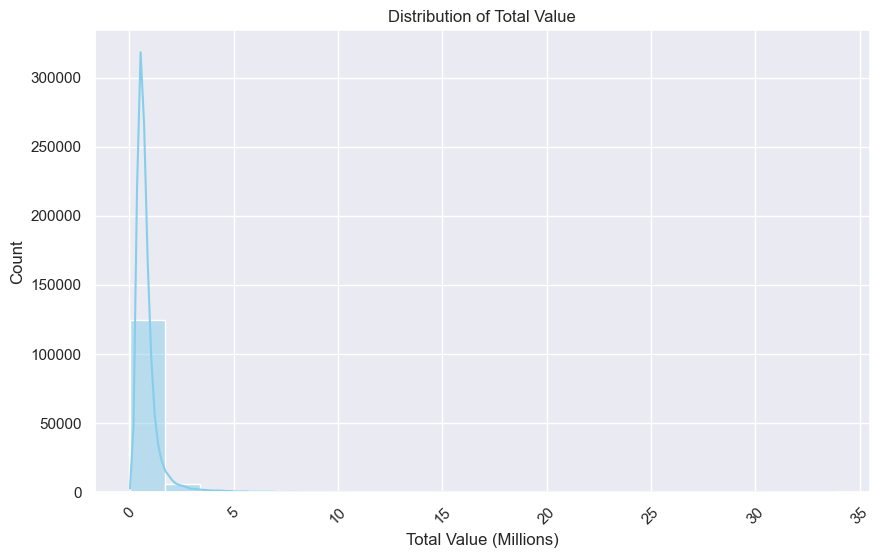

In [119]:
#Distribution of TOTAL_VALUE
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['TOTAL_VALUE'] / 1e6, kde=True, color='skyblue', bins=20)
plt.xlabel('Total Value (Millions)')
plt.ylabel('Count')
plt.title('Distribution of Total Value')
plt.xticks(rotation=45)
plt.show()

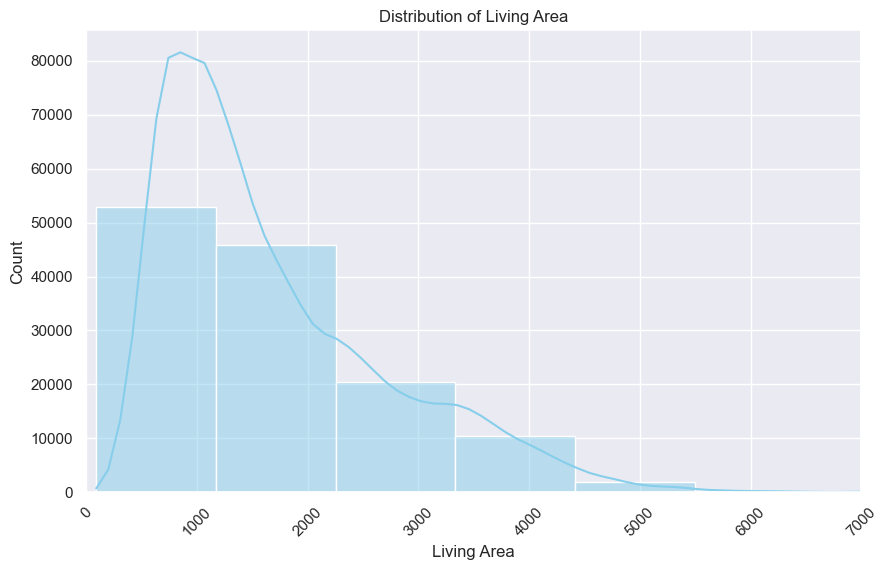

In [120]:
#Distribution of LIVING_AREA
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['LIVING_AREA'], kde=True, color='skyblue', bins=20)
plt.xlabel('Living Area')
plt.ylabel('Count')
plt.title('Distribution of Living Area')
plt.xticks(rotation=45)
plt.xlim(0, 7000)  # Set x-axis limits to 0 and 6000
plt.show()

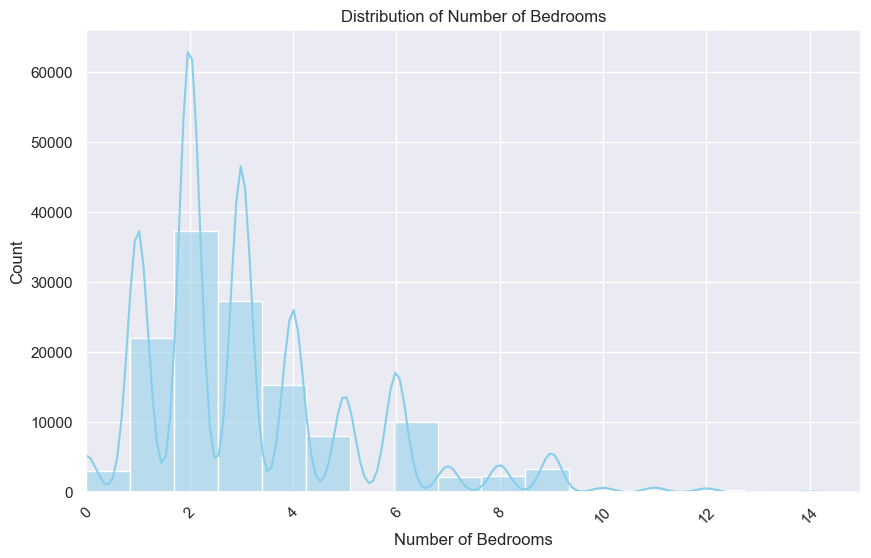

In [121]:
#Distribution of BED_RMS
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['BED_RMS'], kde=True, color='skyblue', bins=20)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Number of Bedrooms')
plt.xticks(rotation=45)
plt.xlim(0, 15)  # Set x-axis limits to 0 and 6000
plt.show()

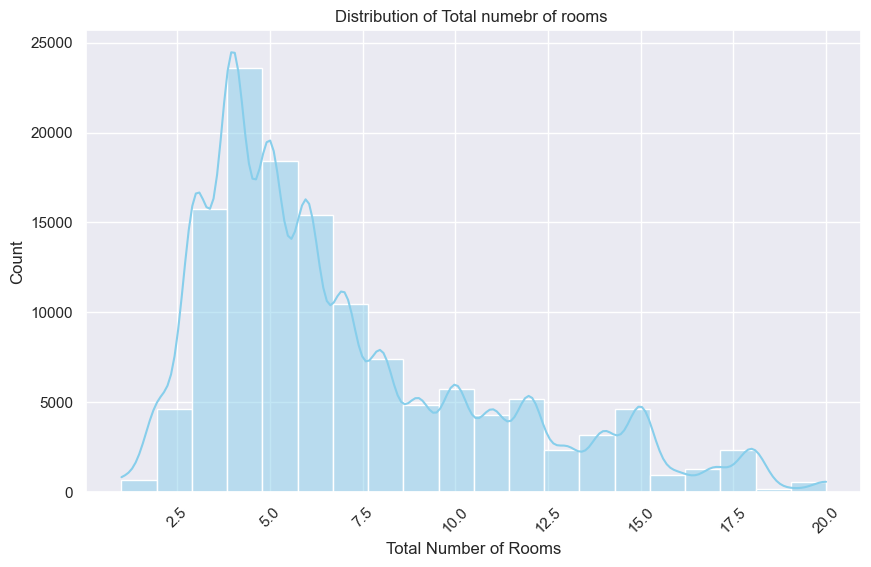

In [122]:
#Distribution of TT_RMS
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['TT_RMS'], kde=True, color='skyblue', bins=20)
plt.xlabel('Total Number of Rooms')
plt.ylabel('Count')
plt.title('Distribution of Total numebr of rooms ')
plt.xticks(rotation=45)
#plt.xlim(0, 15)  # Set x-axis limits to 0 and 6000
plt.show()

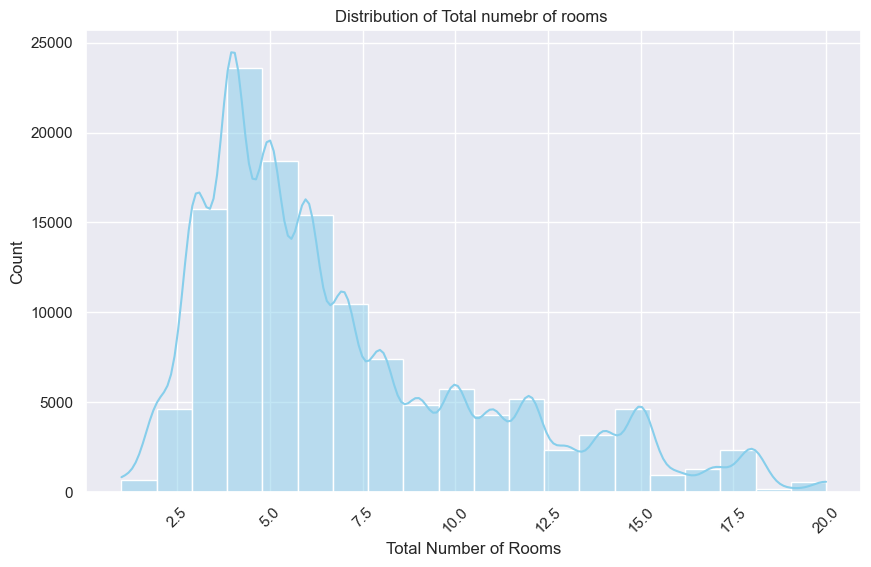

In [123]:
#Distribution of TT_RMS
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['TT_RMS'], kde=True, color='skyblue', bins=20)
plt.xlabel('Total Number of Rooms')
plt.ylabel('Count')
plt.title('Distribution of Total numebr of rooms ')
plt.xticks(rotation=45)
#plt.xlim(0, 15)  # Set x-axis limits to 0 and 6000
plt.show()

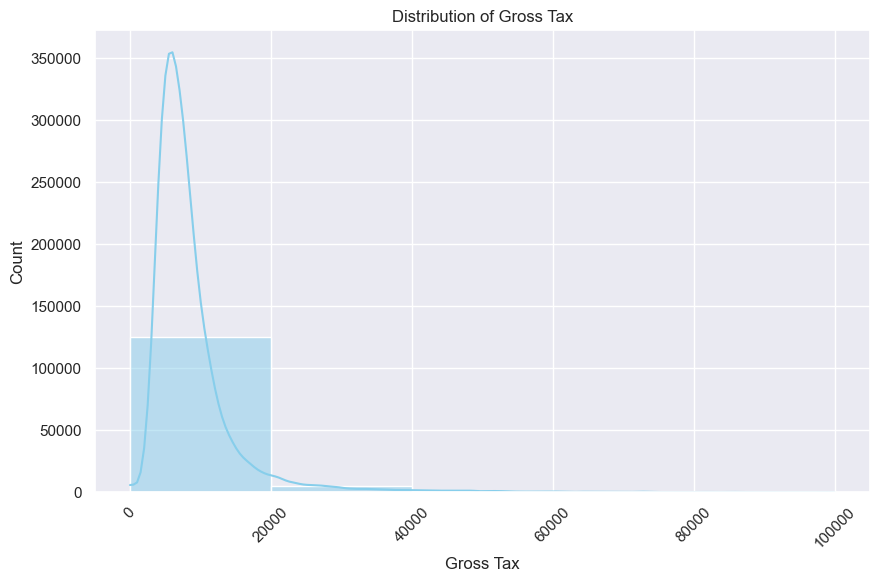

In [128]:

#Drop the outliers 
property_data = property_data[property_data['GROSS_TAX'] <= 100000]
value_counts = property_data['GROSS_TAX'].value_counts()

#Distribution of GROSS_TAX
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=property_data['GROSS_TAX'], kde=True, color='skyblue', bins=5)
plt.xlabel('Gross Tax')
plt.ylabel('Count')
plt.title('Distribution of Gross Tax')
plt.xticks(rotation=45)
#plt.xlim(0, 100000)  # Set x-axis limits to 0 and 6000
plt.show()

### Detection of Outliers

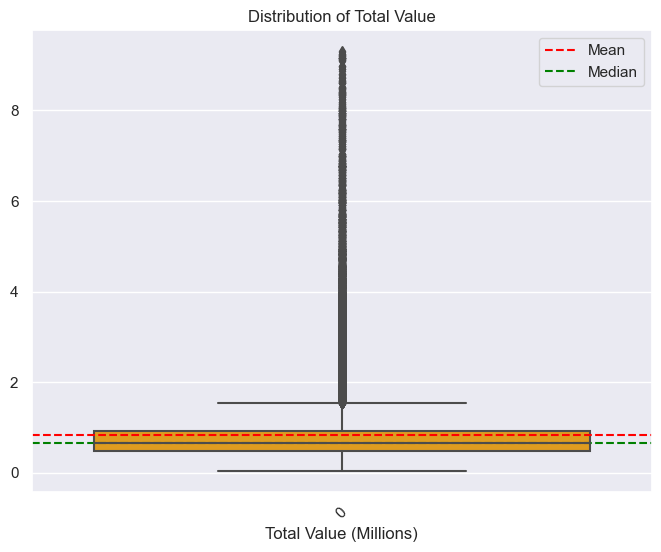

In [135]:
#Check ooutliers for TOTAL_VALUE
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=property_data['TOTAL_VALUE'] / 1e6, color='orange')
plt.xlabel('Total Value (Millions)')
plt.title('Distribution of Total Value')
plt.xticks(rotation=45)

# Calculate mean and median values
mean_value = property_data['TOTAL_VALUE'].mean() / 1e6
median_value = property_data['TOTAL_VALUE'].median() / 1e6

# Add mean and median lines horizontally
plt.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.axhline(median_value, color='green', linestyle='--', label='Median')
plt.legend()

plt.show()

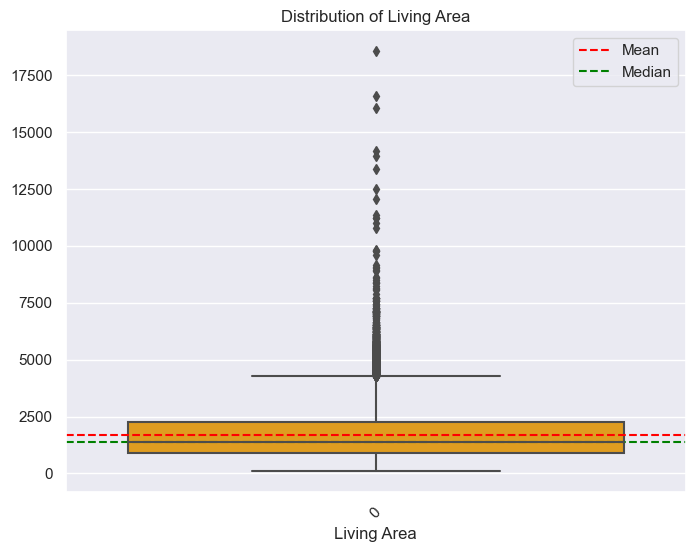

In [133]:
# Enhance the box plot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=property_data['LIVING_AREA'], color='orange')  # Set boxplot color to orange
plt.xlabel('Living Area')
plt.title('Distribution of Living Area')
plt.xticks(rotation=45)

# Calculate mean and median values
mean_value = property_data['LIVING_AREA'].mean()
median_value = property_data['LIVING_AREA'].median()

# Add mean and median lines horizontally
plt.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.axhline(median_value, color='green', linestyle='--', label='Median')
plt.legend()

# Display the plot
plt.show()

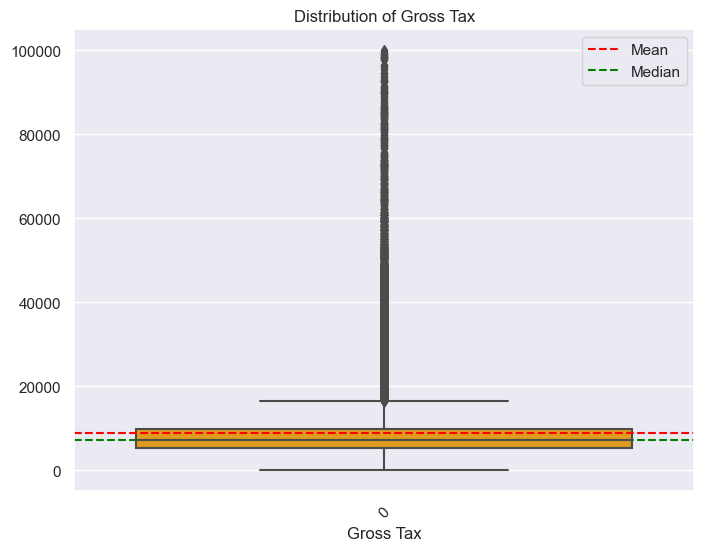

In [134]:
# Enhance the box plot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=property_data['GROSS_TAX'], color='orange')  # Set boxplot color to orange
plt.xlabel('Gross Tax')
plt.title('Distribution of Gross Tax')
plt.xticks(rotation=45)

# Calculate mean and median values
mean_value = property_data['GROSS_TAX'].mean()
median_value = property_data['GROSS_TAX'].median()

# Add mean and median lines horizontally
plt.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.axhline(median_value, color='green', linestyle='--', label='Median')
plt.legend()

# Display the plot
plt.show()



### Piecharts

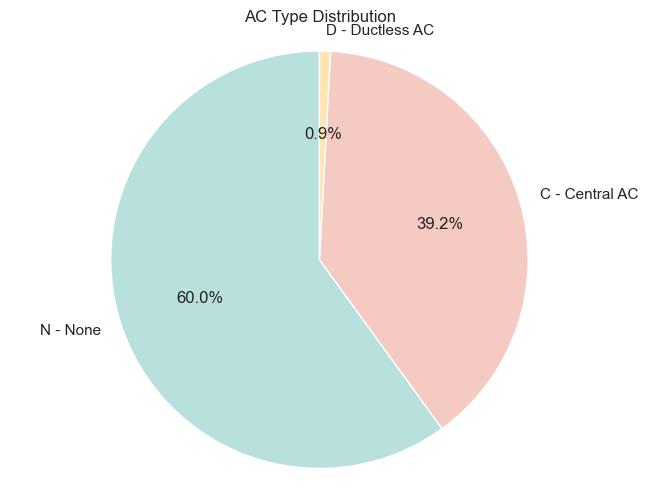

In [138]:
# Count the occurrences of each AC_TYPE
ac_type_counts = property_data['AC_TYPE'].value_counts()

# Define a custom color palette
colors = ['#b8e0dc', '#f5cac3', '#ffe5b4']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.title('AC Type Distribution')
plt.pie(ac_type_counts, labels=ac_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Display the pie chart
plt.show()

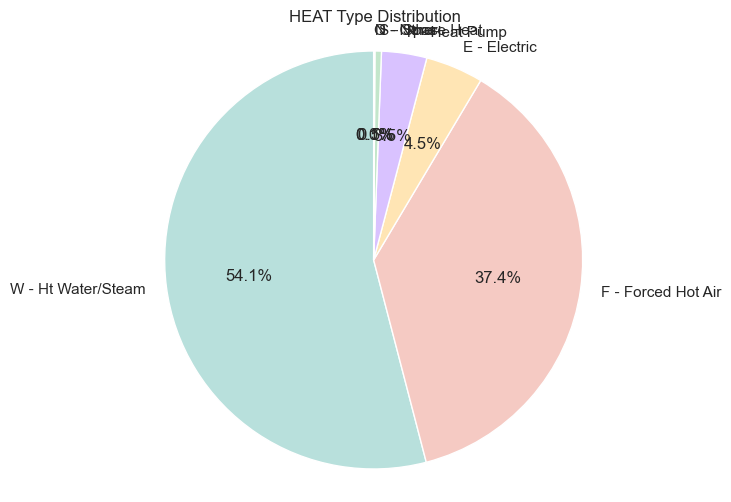

In [139]:
# Count the occurrences of each HEAT_TYPE
heat_type_counts = property_data['HEAT_TYPE'].value_counts()

# Define a custom color palette
colors = ['#b8e0dc', '#f5cac3', '#ffe5b4', '#d9c2ff', '#c3e6cb']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.title('HEAT Type Distribution')
plt.pie(heat_type_counts, labels=heat_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Display the pie chart
plt.show()

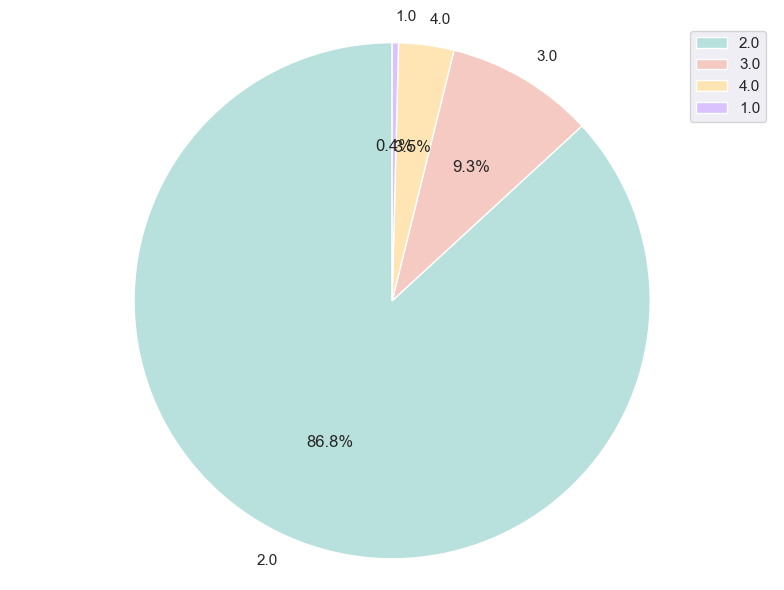

In [146]:
# Count the occurrences of each HEAT_TYPE
heat_type_counts = property_data['PROP_VIEW'].value_counts()

# Define a custom color palette
colors = ['#b8e0dc', '#f5cac3', '#ffe5b4', '#d9c2ff', '#c3e6cb']

# Plot the pie chart
plt.figure(figsize=(8, 6))
patches, texts, _ = plt.pie(heat_type_counts, labels=heat_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Adjust the legend placement
plt.legend(patches, heat_type_counts.index, loc='best')

# Avoid overlapping labels
plt.tight_layout()

# Display the pie chart
plt.show()

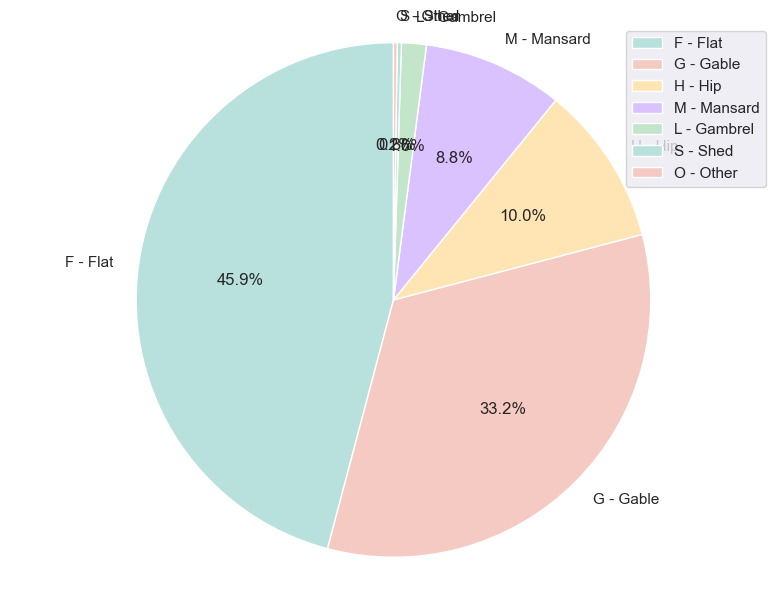

In [147]:
# Count the occurrences of each HEAT_TYPE
heat_type_counts = property_data['ROOF_STRUCTURE'].value_counts()

# Define a custom color palette
colors = ['#b8e0dc', '#f5cac3', '#ffe5b4', '#d9c2ff', '#c3e6cb']

# Plot the pie chart
plt.figure(figsize=(8, 6))
patches, texts, _ = plt.pie(heat_type_counts, labels=heat_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Adjust the legend placement
plt.legend(patches, heat_type_counts.index, loc='best')

# Avoid overlapping labels
plt.tight_layout()

# Display the pie chart
plt.show()

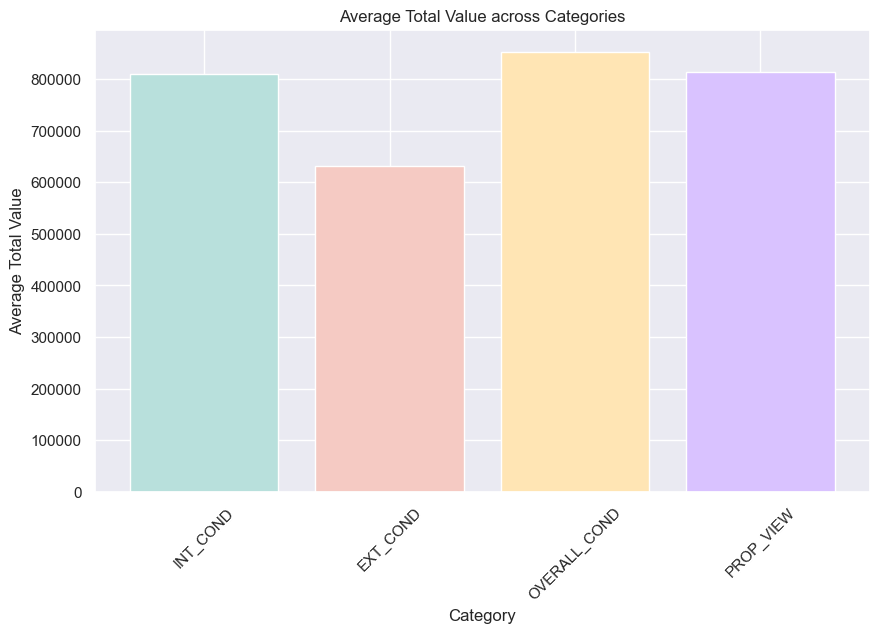

In [154]:
# Calculate average TOTAL_VALUE for each category
int_cond_avg = property_data.groupby('INT_COND')['TOTAL_VALUE'].mean().values[0]
ext_cond_avg = property_data.groupby('EXT_COND')['TOTAL_VALUE'].mean().values[0]
overall_cond_avg = property_data.groupby('OVERALL_COND')['TOTAL_VALUE'].mean().values[0]
prop_view_avg = property_data.groupby('PROP_VIEW')['TOTAL_VALUE'].mean().values[0]

# Bar chart
categories = ['INT_COND', 'EXT_COND', 'OVERALL_COND', 'PROP_VIEW']
values = [int_cond_avg, ext_cond_avg, overall_cond_avg, prop_view_avg]

# Define a custom color palette
colors = ['#b8e0dc', '#f5cac3', '#ffe5b4', '#d9c2ff']

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.xlabel('Category')
plt.ylabel('Average Total Value')
plt.title('Average Total Value across Categories')
plt.xticks(rotation=45)

plt.show()


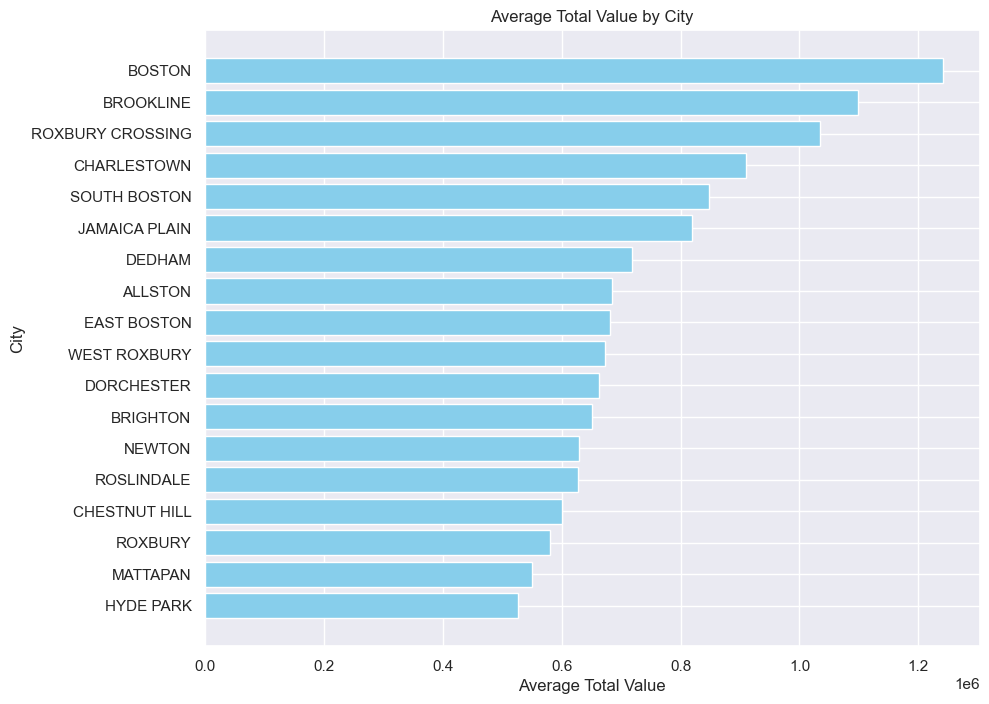

In [161]:
# Calculate average TOTAL_VALUE for each city
average_total_value = property_data.groupby('CITY')['TOTAL_VALUE'].mean().sort_values()

# Horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(average_total_value.index, average_total_value, color='skyblue')
plt.xlabel('Average Total Value')
plt.ylabel('City')
plt.title('Average Total Value by City')

plt.show()

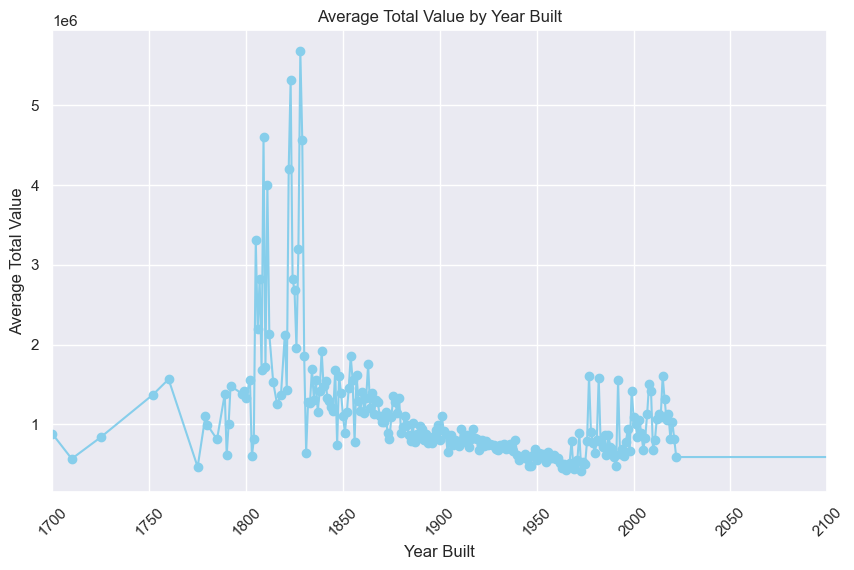

In [166]:
# Calculate average TOTAL_VALUE for each YR_BUILT
average_total_value = property_data.groupby('YR_BUILT')['TOTAL_VALUE'].mean()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(average_total_value.index, average_total_value, color='skyblue', marker='o')
plt.xlabel('Year Built')
plt.ylabel('Average Total Value')
plt.title('Average Total Value by Year Built')
plt.xticks(rotation=45)

# Set x-axis limits
plt.xlim(1700, 2100)

plt.show()

### Correlation Plot

In [168]:
corr = property_data.corr()

corr.style.background_gradient(cmap='coolwarm', low=0.8, high=0.2).set_precision(2)

,ZIP_CODE,LIVING_AREA,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,PROP_VIEW
ZIP_CODE,1.00,-0.07,-0.06,-0.06,0.06,-0.00,-0.04,-0.01,-0.01,-0.07,-0.06,0.00,-0.06,-0.07,-0.02
LIVING_AREA,-0.07,1.00,0.42,0.42,-0.12,-0.16,-0.14,-0.16,0.06,0.85,0.75,0.18,0.75,0.89,-0.08
TOTAL_VALUE,-0.06,0.42,1.00,1.00,0.00,0.08,0.35,0.30,0.30,0.19,0.45,0.26,0.13,0.21,0.35
GROSS_TAX,-0.06,0.42,1.00,1.00,0.00,0.08,0.35,0.30,0.30,0.19,0.45,0.26,0.13,0.21,0.35
YR_BUILT,0.06,-0.12,0.00,0.00,1.00,0.12,0.21,0.27,0.12,-0.14,-0.05,0.08,-0.16,-0.16,0.14
YR_REMODEL,-0.00,-0.16,0.08,0.08,0.12,1.00,0.31,0.24,0.18,-0.18,-0.03,0.04,-0.19,-0.21,0.10
INT_COND,-0.04,-0.14,0.35,0.35,0.21,0.31,1.00,0.59,0.44,-0.24,0.05,0.09,-0.26,-0.27,0.33
EXT_COND,-0.01,-0.16,0.30,0.30,0.27,0.24,0.59,1.00,0.40,-0.27,0.02,0.07,-0.25,-0.29,0.35
OVERALL_COND,-0.01,0.06,0.30,0.30,0.12,0.18,0.44,0.40,1.00,-0.02,0.16,0.17,-0.07,-0.03,0.16
BED_RMS,-0.07,0.85,0.19,0.19,-0.14,-0.18,-0.24,-0.27,-0.02,1.00,0.69,0.09,0.78,0.93,-0.18


### VIF 

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Performing VIF (variance inflation factor) to track multicollinearity 

# the independent variables set
numerical_columns = property_data.select_dtypes(include=['int64', 'float64']).columns
numerical_data = property_data[numerical_columns]
numerical_data

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(len(numerical_data.columns))]

print(vif_data)

         feature     VIF
0       ZIP_CODE 1309.36
1    LIVING_AREA   26.30
2    TOTAL_VALUE  457.32
3      GROSS_TAX  450.19
4       YR_BUILT  846.82
5     YR_REMODEL  880.52
6       INT_COND   32.07
7       EXT_COND   32.72
8   OVERALL_COND   32.23
9        BED_RMS   24.89
10      FULL_BTH   15.58
11       HLF_BTH    1.67
12      KITCHENS   22.34
13        TT_RMS   55.10
14     PROP_VIEW   30.09


### One-Hot Encoding 

In [171]:
# Get a list of categorical columns
categorical_columns = property_data.select_dtypes(include='object').columns.tolist()

# Perform one-hot encoding for all categorical columns
encoded_df = pd.get_dummies(property_data, columns=categorical_columns)

# Print the encoded DataFrame
display(encoded_df)

,ZIP_CODE,LIVING_AREA,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,PROP_VIEW,CITY_ALLSTON,CITY_BOSTON,CITY_BRIGHTON,CITY_BROOKLINE,CITY_CHARLESTOWN,CITY_CHESTNUT HILL,CITY_DEDHAM,CITY_DORCHESTER,CITY_EAST BOSTON,CITY_HYDE PARK,CITY_JAMAICA PLAIN,CITY_MATTAPAN,CITY_NEWTON,CITY_ROSLINDALE,CITY_ROXBURY,CITY_ROXBURY CROSSING,CITY_SOUTH BOSTON,CITY_WEST ROXBURY,LU_A,LU_C,LU_CC,LU_CD,LU_E,LU_EA,LU_R1,LU_R2,LU_R3,LU_R4,LU_RC,ROOF_STRUCTURE_F - Flat,ROOF_STRUCTURE_G - Gable,ROOF_STRUCTURE_H - Hip,ROOF_STRUCTURE_L - Gambrel,ROOF_STRUCTURE_M - Mansard,ROOF_STRUCTURE_O - Other,ROOF_STRUCTURE_S - Shed,INT_WALL_E - Elaborate,INT_WALL_G - Good,INT_WALL_N - Normal,INT_WALL_S - Substandard,EXT_FNISHED_01 - Brick,EXT_FNISHED_09 - Wood Siding,EXT_FNISHED_10 - Alum/Vinyl,EXT_FNISHED_A - Asbestos,EXT_FNISHED_B - Brick/Stone,EXT_FNISHED_C - Cement Board,EXT_FNISHED_F - Frame/Clapbrd,EXT_FNISHED_G - Glass,EXT_FNISHED_K - Concrete,EXT_FNISHED_M - Vinyl,EXT_FNISHED_O - Other,EXT_FNISHED_P - Asphalt,EXT_FNISHED_S - Stucco,EXT_FNISHED_U - Alum Siding,EXT_FNISHED_V - Brck/Stn Venr,EXT_FNISHED_W - Wood Shake,KITCHEN_TYPE_0F - 0 Full Eat In Kitchens,KITCHEN_TYPE_1F - 1 Full Eat In Kitchens,KITCHEN_TYPE_2F - 2 Full Eat In Kitchens,KITCHEN_TYPE_3F - 3 Full Eat In Kitchens,KITCHEN_TYPE_4F - 4 Full Eat In Kitchens,KITCHEN_TYPE_5F - 5 Full Eat In Kitchens,KITCHEN_TYPE_F - Full Eat In,KITCHEN_TYPE_N - None,KITCHEN_TYPE_O - One Person,KITCHEN_TYPE_P - Pullman,HEAT_TYPE_E - Electric,HEAT_TYPE_F - Forced Hot Air,HEAT_TYPE_N - None,HEAT_TYPE_O - Other,HEAT_TYPE_P - Heat Pump,HEAT_TYPE_S - Space Heat,HEAT_TYPE_W - Ht Water/Steam,AC_TYPE_C - Central AC,AC_TYPE_D - Ductless AC,AC_TYPE_N - None
0,2128.00,2202.00,784200.00,8422.31,1900.00,1900.00,2.00,2.00,2.00,6.00,3.00,0.00,3.00,12.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2128.00,2307.00,811800.00,8718.73,1920.00,2000.00,2.00,2.00,2.00,3.00,3.00,0.00,3.00,9.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2128.00,2268.00,796300.00,8552.26,1905.00,1985.00,2.00,3.00,2.00,5.00,3.00,0.00,3.00,13.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2128.00,2028.00,727900.00,7817.65,1900.00,1991.00,2.00,2.00,2.00,5.00,3.00,0.00,3.00,11.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,2128.00,2546.00,794800.00,8536.15,1900.00,1978.00,2.00,2.00,2.00,6.00,3.00,0.00,2.00,13.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180617,2135.00,2390.40,887200.00,9528.53,1920.00,1920.00,2.00,2.00,2.00,7.00,2.00,1.00,1.00,10.00,2.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
180618,2135.00,2951.60,1115300.00,11978.32,1920.00,1920.00,2.00,2.00,2.00,5.00,2.00,0.00,2.00,11.00,2.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
180620,2135.00,1410.00,545100.00,5854.37,1920.00,1920.00,2.00,2.00,2.00,3.00,1.00,0.00,1.00,8.00,2.00,0,0,1,0,0,0,0,0,0,0

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Performing VIF (variance inflation factor) to track multicollinearity 

# the independent variables set
x_encoded_df= encoded_df.drop(['TOTAL_VALUE'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x_encoded_df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_encoded_df.values, i) for i in range(len(x_encoded_df.columns))]


In [173]:
filtered_vif_data = vif_data[vif_data["VIF"] < 50]
display(filtered_vif_data)

,feature,VIF
0,ZIP_CODE,4.86
1,LIVING_AREA,8.11
2,GROSS_TAX,3.43
3,YR_BUILT,1.22
4,YR_REMODEL,1.18
5,INT_COND,2.21
6,EXT_COND,2.10
7,OVERALL_COND,1.44
8,BED_RMS,7.88
9,FULL_BTH,3.44


### Train  - Test Split 

In [178]:

X = encoded_df.drop('TOTAL_VALUE', axis=1)
Y = encoded_df[['TOTAL_VALUE']]
# Assuming you have your feature data in X and target variable in y
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X.head())
display(Y.head())

,ZIP_CODE,LIVING_AREA,GROSS_TAX,YR_BUILT,YR_REMODEL,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,PROP_VIEW,CITY_ALLSTON,CITY_BOSTON,CITY_BRIGHTON,CITY_BROOKLINE,CITY_CHARLESTOWN,CITY_CHESTNUT HILL,CITY_DEDHAM,CITY_DORCHESTER,CITY_EAST BOSTON,CITY_HYDE PARK,CITY_JAMAICA PLAIN,CITY_MATTAPAN,CITY_NEWTON,CITY_ROSLINDALE,CITY_ROXBURY,CITY_ROXBURY CROSSING,CITY_SOUTH BOSTON,CITY_WEST ROXBURY,LU_A,LU_C,LU_CC,LU_CD,LU_E,LU_EA,LU_R1,LU_R2,LU_R3,LU_R4,LU_RC,ROOF_STRUCTURE_F - Flat,ROOF_STRUCTURE_G - Gable,ROOF_STRUCTURE_H - Hip,ROOF_STRUCTURE_L - Gambrel,ROOF_STRUCTURE_M - Mansard,ROOF_STRUCTURE_O - Other,ROOF_STRUCTURE_S - Shed,INT_WALL_E - Elaborate,INT_WALL_G - Good,INT_WALL_N - Normal,INT_WALL_S - Substandard,EXT_FNISHED_01 - Brick,EXT_FNISHED_09 - Wood Siding,EXT_FNISHED_10 - Alum/Vinyl,EXT_FNISHED_A - Asbestos,EXT_FNISHED_B - Brick/Stone,EXT_FNISHED_C - Cement Board,EXT_FNISHED_F - Frame/Clapbrd,EXT_FNISHED_G - Glass,EXT_FNISHED_K - Concrete,EXT_FNISHED_M - Vinyl,EXT_FNISHED_O - Other,EXT_FNISHED_P - Asphalt,EXT_FNISHED_S - Stucco,EXT_FNISHED_U - Alum Siding,EXT_FNISHED_V - Brck/Stn Venr,EXT_FNISHED_W - Wood Shake,KITCHEN_TYPE_0F - 0 Full Eat In Kitchens,KITCHEN_TYPE_1F - 1 Full Eat In Kitchens,KITCHEN_TYPE_2F - 2 Full Eat In Kitchens,KITCHEN_TYPE_3F - 3 Full Eat In Kitchens,KITCHEN_TYPE_4F - 4 Full Eat In Kitchens,KITCHEN_TYPE_5F - 5 Full Eat In Kitchens,KITCHEN_TYPE_F - Full Eat In,KITCHEN_TYPE_N - None,KITCHEN_TYPE_O - One Person,KITCHEN_TYPE_P - Pullman,HEAT_TYPE_E - Electric,HEAT_TYPE_F - Forced Hot Air,HEAT_TYPE_N - None,HEAT_TYPE_O - Other,HEAT_TYPE_P - Heat Pump,HEAT_TYPE_S - Space Heat,HEAT_TYPE_W - Ht Water/Steam,AC_TYPE_C - Central AC,AC_TYPE_D - Ductless AC,AC_TYPE_N - None
0,2128.00,2202.00,8422.31,1900.00,1900.00,2.00,2.00,2.00,6.00,3.00,0.00,3.00,12.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2128.00,2307.00,8718.73,1920.00,2000.00,2.00,2.00,2.00,3.00,3.00,0.00,3.00,9.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2128.00,2268.00,8552.26,1905.00,1985.00,2.00,3.00,2.00,5.00,3.00,0.00,3.00,13.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2128.00,2028.00,7817.65,1900.00,1991.00,2.00,2.00,2.00,5.00,3.00,0.00,3.00,11.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,2128.00,2546.00,8536.15,1900.00,1978.00,2.00,2.00,2.00,6.00,3.00,0.00,2.00,13.00,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


,TOTAL_VALUE
0,784200.00
1,811800.00
2,796300.00
3,727900.00
4,794800.00


In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Linear Regression 

In [180]:
regr = LinearRegression()
 
regr.fit(X_train, Y_train)
print(regr.score(X_test, Y_test))

0.9962273614383452


In [183]:
mod = sm.OLS(Y_train, X_train)

lin = mod.fit()

print(lin.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTAL_VALUE   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.171e+06
Date:                Sun, 25 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:12:03   Log-Likelihood:            -1.2070e+06
No. Observations:              105492   AIC:                         2.414e+06
Df Residuals:                  105410   BIC:                         2.415e+06
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [185]:
summary = lin.summary()
results_data = []
for row in summary.tables[1].data[1:]:
    results_data.append([val if val != '' else float('nan') for val in row])

column_names = summary.tables[1].data[0]
df = pd.DataFrame(results_data, columns=column_names)

numeric_columns = ['coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

filtered_df = df[df['P>|t|'] < 0.05]

filtered_df

,,coef,std err,t,P>|t|,[0.025,0.975]
0,ZIP_CODE,13.54,4.60,2.94,0.00,4.53,22.55
1,LIVING_AREA,3.33,0.19,17.76,0.00,2.96,3.70
2,GROSS_TAX,92.80,0.02,5257.19,0.00,92.77,92.84
6,EXT_COND,489.88,169.04,2.90,0.00,158.56,821.20
7,OVERALL_COND,760.07,177.13,4.29,0.00,412.89,1107.24
8,BED_RMS,-283.71,93.22,-3.04,0.00,-466.42,-101.00
9,FULL_BTH,645.16,148.54,4.34,0.00,354.02,936.30
10,HLF_BTH,751.02,164.69,4.56,0.00,428.23,1073.81
11,KITCHENS,5110.15,622.57,8.21,0.00,3889.92,6330.38
13,PROP_VIEW,-407.51,183.20,-2.22,0.03,-766.58,-48.44


In [187]:
predicted = regr.predict(X_test)
actual = Y_test

# Calculate mean squared error
mse = mean_squared_error(actual, predicted)
# Calculate root mean squared error
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 41225.807145689134


In [189]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor(n_estimators = 50, random_state= 40)

rf.fit(X_train, Y_train)

rf.score(X_test, Y_test)


0.9982916971583877